# load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

# load the data

In [2]:
pdday1=pd.read_csv("cohort4day1longform.csv")
pdday2=pd.read_csv("cohort4day2longform.csv")

In [3]:
pdday1

,Flynum,Concentration,Cohort,Trial,Batch,Odor,Occupancy,Day,FlyIDConstant
0,1,0.39,4,1,1,On,0.588235,1,Yes
1,2,0.39,4,1,1,On,0.608289,1,Yes
2,3,0.39,4,1,1,On,0.201872,1,Yes
3,4,0.39,4,1,1,On,0.411765,1,Yes
4,5,0.39,4,1,1,On,0.008021,1,Yes
...,...,...,...,...,...,...,...,...,...
235,11,0.39,4,2,4,Off,0.475669,1,Yes
236,12,0.39,4,2,4,Off,0.427007,1,Yes
237,13,0.39,4,2,4,Off,0.307786,1,Yes
238,14,0.39,4,2,4,Off,0.490268,1,Yes


In [4]:
s1= pdday1
s2= pdday2
data_all= pd.concat([s1,s2])
data_all

,Flynum,Concentration,Cohort,Trial,Batch,Odor,Occupancy,Day,FlyIDConstant
0,1,0.39,4,1,1,On,0.588235,1,Yes
1,2,0.39,4,1,1,On,0.608289,1,Yes
2,3,0.39,4,1,1,On,0.201872,1,Yes
3,4,0.39,4,1,1,On,0.411765,1,Yes
4,5,0.39,4,1,1,On,0.008021,1,Yes
...,...,...,...,...,...,...,...,...,...
115,11,0.39,4,1,4,Off,0.530686,2,Yes
116,12,0.39,4,1,4,Off,0.385078,2,Yes
117,13,0.39,4,1,4,Off,0.280385,2,Yes
118,14,0.39,4,1,4,Off,0.608905,2,Yes


In [5]:
droptrials=pd.DataFrame({'Day':[1,1,1,1,1,2], 'Batch':[2,2,3,3,4,3], 'Flynum':[12,9,9,12,13,5], "Discard":[True,True,True,True,True,True]} )
droptrials

,Day,Batch,Flynum,Discard
0,1,2,12,True
1,1,2,9,True
2,1,3,9,True
3,1,3,12,True
4,1,4,13,True
5,2,3,5,True


In [6]:
#find columns where droptrials matches data_all
data_all_filtered=pd.merge(data_all, droptrials, on=['Day', 'Batch', 'Flynum'], how='outer',indicator=True)
data_all_filtered=data_all_filtered[data_all_filtered._merge=='left_only']
data_all=data_all_filtered.drop(['_merge', 'Discard'], axis=1)

In [7]:
data_all

,Flynum,Concentration,Cohort,Trial,Batch,Odor,Occupancy,Day,FlyIDConstant
0,1,0.39,4,1,1,On,0.588235,1,Yes
1,1,0.39,4,1,1,Off,0.469484,1,Yes
2,1,0.39,4,2,1,On,0.690349,1,Yes
3,1,0.39,4,2,1,Off,0.475962,1,Yes
4,2,0.39,4,1,1,On,0.608289,1,Yes
...,...,...,...,...,...,...,...,...,...
355,13,0.39,4,1,4,Off,0.280385,2,Yes
356,14,0.39,4,1,4,On,0.545969,2,Yes
357,14,0.39,4,1,4,Off,0.608905,2,Yes
358,15,0.39,4,1,4,On,0.526167,2,Yes


In [8]:
data_all["Hours"]=((data_all["Day"]-1)*24)+(data_all["Trial"].astype(int)-1)*2
data_all["flyid"]=pd.Categorical("C"+data_all["Cohort"].astype(str)+"-B"+data_all["Batch"].astype(str)+"-F"+data_all["Flynum"].astype(str))

data_all

,Flynum,Concentration,Cohort,Trial,Batch,Odor,Occupancy,Day,FlyIDConstant,Hours,flyid
0,1,0.39,4,1,1,On,0.588235,1,Yes,0,C4-B1-F1
1,1,0.39,4,1,1,Off,0.469484,1,Yes,0,C4-B1-F1
2,1,0.39,4,2,1,On,0.690349,1,Yes,2,C4-B1-F1
3,1,0.39,4,2,1,Off,0.475962,1,Yes,2,C4-B1-F1
4,2,0.39,4,1,1,On,0.608289,1,Yes,0,C4-B1-F2
...,...,...,...,...,...,...,...,...,...,...,...
355,13,0.39,4,1,4,Off,0.280385,2,Yes,24,C4-B4-F13
356,14,0.39,4,1,4,On,0.545969,2,Yes,24,C4-B4-F14
357,14,0.39,4,1,4,Off,0.608905,2,Yes,24,C4-B4-F14
358,15,0.39,4,1,4,On,0.526167,2,Yes,24,C4-B4-F15


In [9]:
data_minimal=data_all[data_all["Odor"]=="On"][["Hours", "Occupancy", "flyid"]]
data_minimal["flyid"]=pd.Categorical(data_minimal["flyid"])

In [10]:
#plot the occupancy for each combination of batch and flynum

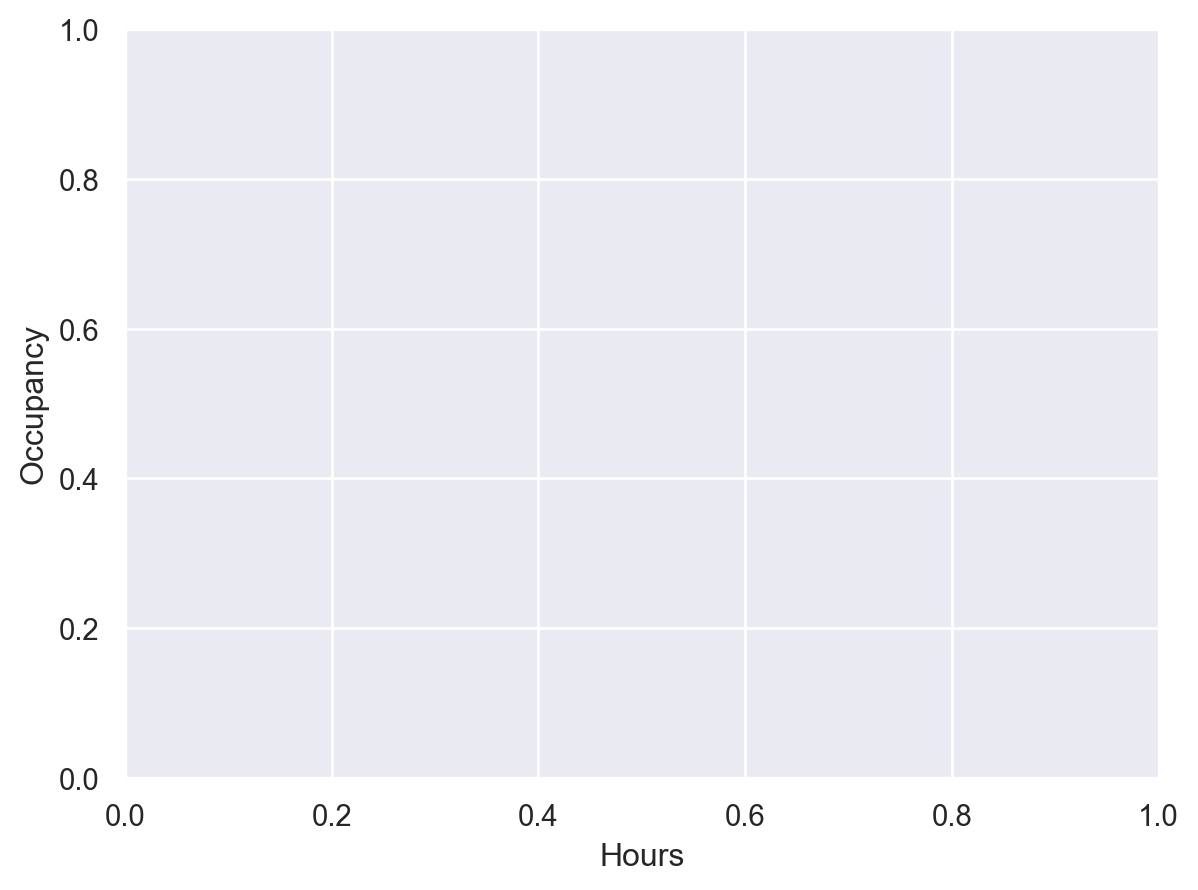

In [11]:
plot1=so.Plot(data=data_all, x='Hours', y="Occupancy", color="flyid", linestyle="Odor", group="flyid")
plot1

<Axes: xlabel='Occupancy', ylabel='Density'>

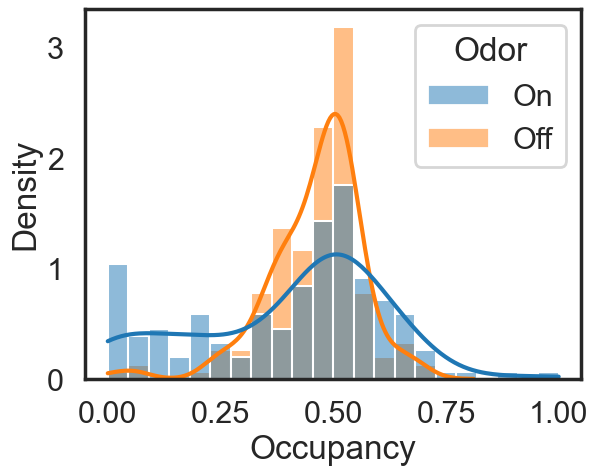

In [12]:
sns.set_context("poster")
sns.set_style("white")
sns.kdeplot(data_all, x="Occupancy", hue="Odor", fill=False, clip=[0,1])
sns.histplot(data_all, x="Occupancy", hue="Odor",stat="density")

/Users/sam-kenysaintpre/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


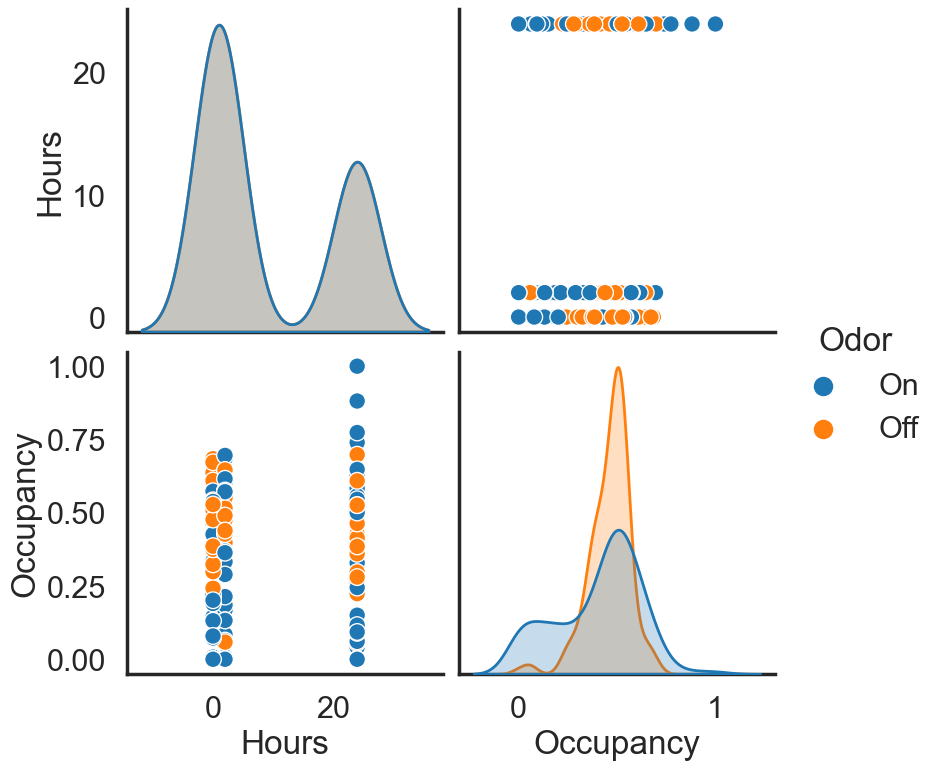

In [13]:
sns.pairplot(data_all, hue="Odor", vars=["Hours", "Occupancy"], diag_kind="kde", size=4)

In [14]:
from sklearn import linear_model


In [15]:
#Create a linear model of occupancy vs time for each fly
# Create linear regression object
regr = linear_model.LinearRegression()


In [16]:
data_minimal.pivot(index="flyid", columns="Hours", values="Occupancy")

Hours,0,2,24
flyid,,,
C4-B1-F1,0.588235,0.690349,0.739837
C4-B1-F10,0.479947,0.537534,0.514905
C4-B1-F11,0.629679,0.348525,0.692412
C4-B1-F12,0.403743,0.296247,0.150407
C4-B1-F13,0.205882,0.167560,0.116531
C4-B1-F14,0.639037,0.450402,0.506775
C4-B1-F15,0.506684,0.554960,0.654472
C4-B1-F2,0.608289,0.506702,0.604336
C4-B1-F3,0.201872,0.347185,0.287263


In [17]:
data_minimal

,Hours,Occupancy,flyid
0,0,0.588235,C4-B1-F1
2,2,0.690349,C4-B1-F1
4,0,0.608289,C4-B1-F2
6,2,0.506702,C4-B1-F2
8,0,0.201872,C4-B1-F3
...,...,...,...
350,24,0.500707,C4-B4-F11
352,24,0.557284,C4-B4-F12
354,24,1.000000,C4-B4-F13
356,24,0.545969,C4-B4-F14


In [18]:
#so.Plot(data=data_minimal, x='Hours', y="Occupancy", color="flyid").add(so.Dots(), so.Agg()).facet(col="flyid")

In [19]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [20]:
data_minimal

,Hours,Occupancy,flyid
0,0,0.588235,C4-B1-F1
2,2,0.690349,C4-B1-F1
4,0,0.608289,C4-B1-F2
6,2,0.506702,C4-B1-F2
8,0,0.201872,C4-B1-F3
...,...,...,...
350,24,0.500707,C4-B4-F11
352,24,0.557284,C4-B4-F12
354,24,1.000000,C4-B4-F13
356,24,0.545969,C4-B4-F14


In [21]:
# calculate the linear regression for each fly
#pivot data_minimal to get a column for each hour

data_minimal_pivot=data_minimal.pivot(index="flyid", columns="Hours", values="Occupancy")
data_minimal_pivot

Hours,0,2,24
flyid,,,
C4-B1-F1,0.588235,0.690349,0.739837
C4-B1-F10,0.479947,0.537534,0.514905
C4-B1-F11,0.629679,0.348525,0.692412
C4-B1-F12,0.403743,0.296247,0.150407
C4-B1-F13,0.205882,0.167560,0.116531
C4-B1-F14,0.639037,0.450402,0.506775
C4-B1-F15,0.506684,0.554960,0.654472
C4-B1-F2,0.608289,0.506702,0.604336
C4-B1-F3,0.201872,0.347185,0.287263


Text(0.5, 1.0, 'Correlation between occupancy at different times')

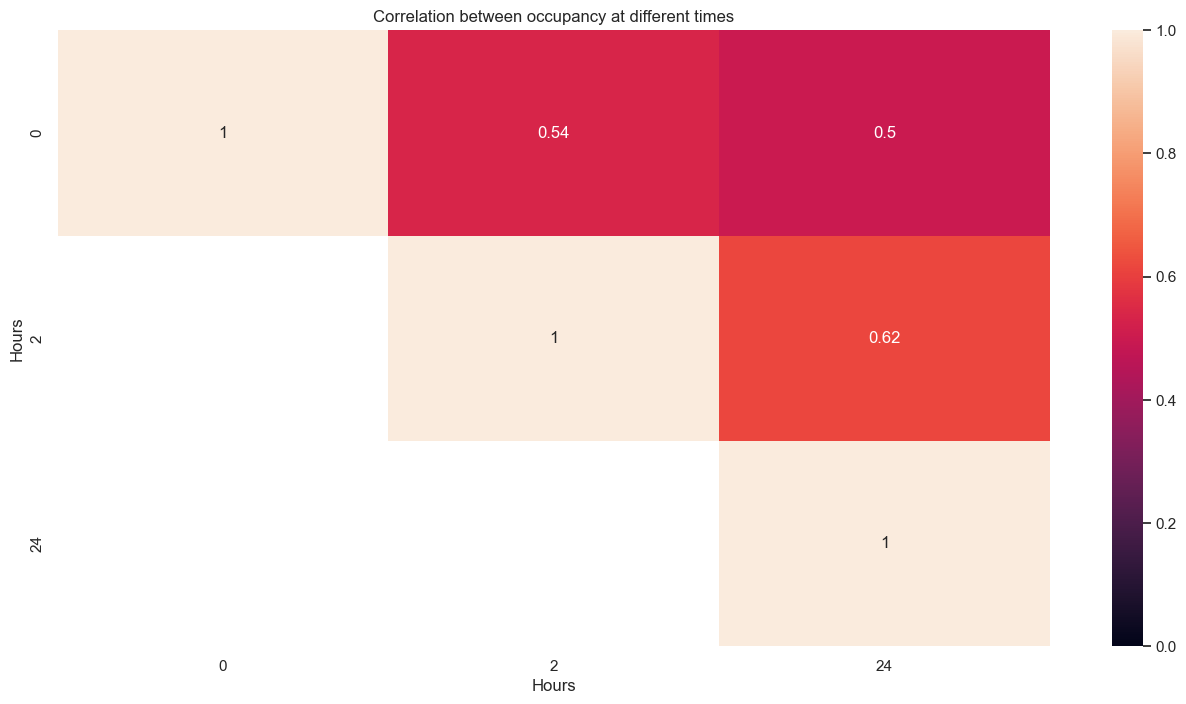

In [22]:
sns.set_theme(style="white")
corr=data_minimal_pivot.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data_minimal_pivot.corr(), mask=~mask, vmin=0, vmax=1, annot=True)
plt.title("Correlation between occupancy at different times")

In [23]:
traintest=data_minimal_pivot.groupby(["Avg","Avg","Avg","Avg","Avg","Last"], axis=1).mean()
daycorr=traintest.corr()
mask = np.triu(np.ones_like(daycorr, dtype=bool))

sns.heatmap(daycorr, mask=~mask, vmin=0, vmax=1, annot=True)
plt.title("Correlation between occupancy at different times")

KeyError: 'Avg'

Text(0, 0.5, 'Occupancy at 28 hours')

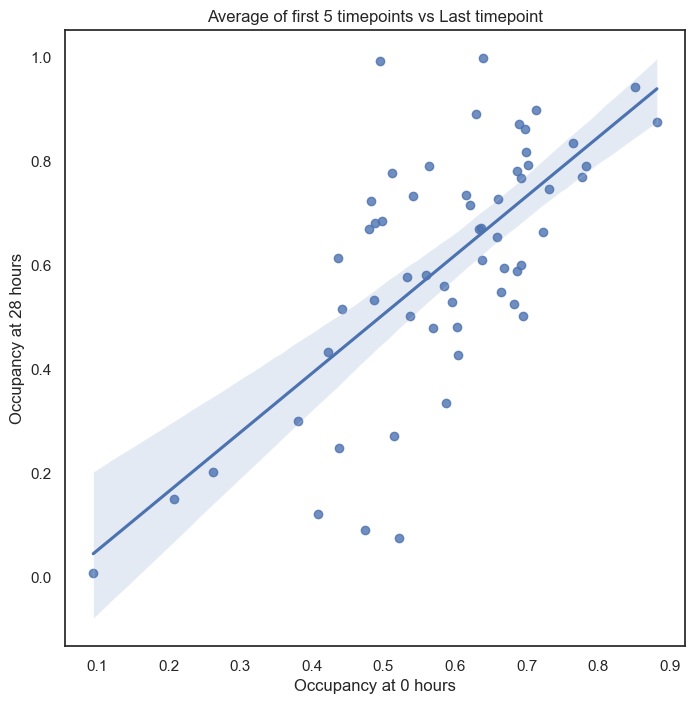

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(data=traintest, x="Avg", y="Last", ci=95, label="Last")
plt.title("Average of first 5 timepoints vs Last timepoint")
plt.xlabel("Occupancy at 0 hours")
plt.ylabel("Occupancy at 28 hours")

In [ ]:
traintest

,Avg,Last
flyid,,
C6-B1-F1,0.686884,0.589393
C6-B1-F10,0.537488,0.502994
C6-B1-F11,0.697448,0.862275
C6-B1-F12,0.487132,0.533790
C6-B1-F13,0.487467,0.680924
C6-B1-F14,0.511848,0.777588
C6-B1-F15,0.541301,0.733105
C6-B1-F2,0.483018,0.722840
C6-B1-F3,0.683049,0.526091


In [ ]:
data_minimal_pivot[[0,28]]

Hours,0,28
flyid,,
C6-B1-F1,0.455963,0.589393
C6-B1-F10,0.525688,0.502994
C6-B1-F11,0.621101,0.862275
C6-B1-F12,0.419266,0.533790
C6-B1-F13,0.250459,0.680924
C6-B1-F14,0.342202,0.777588
C6-B1-F15,0.475229,0.733105
C6-B1-F2,0.165138,0.722840
C6-B1-F3,0.698165,0.526091


Text(0, 0.5, 'Occupancy at 28 hours')

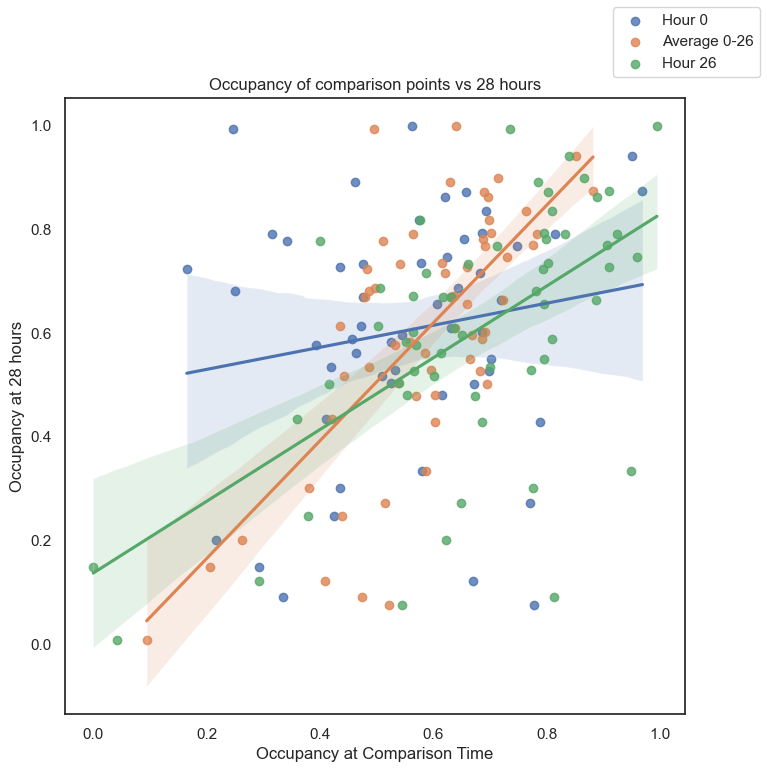

In [ ]:
#set figure to be square
fig, ax = plt.subplots(figsize=(8,8))
sns.set_context("notebook")
sns.regplot(x=data_minimal_pivot[[0]],y=data_minimal_pivot[[28]], label="Hour 0")

sns.regplot(data=traintest, x="Avg", y="Last", label="Average 0-26")
sns.regplot(x=data_minimal_pivot[[26]],y=data_minimal_pivot[[28]], label="Hour 26")
fig.legend()
plt.title("Occupancy of comparison points vs 28 hours")

plt.xlabel("Occupancy at Comparison Time")
plt.ylabel("Occupancy at 28 hours")

Text(0, 0.5, 'Occupancy at 28 hours')

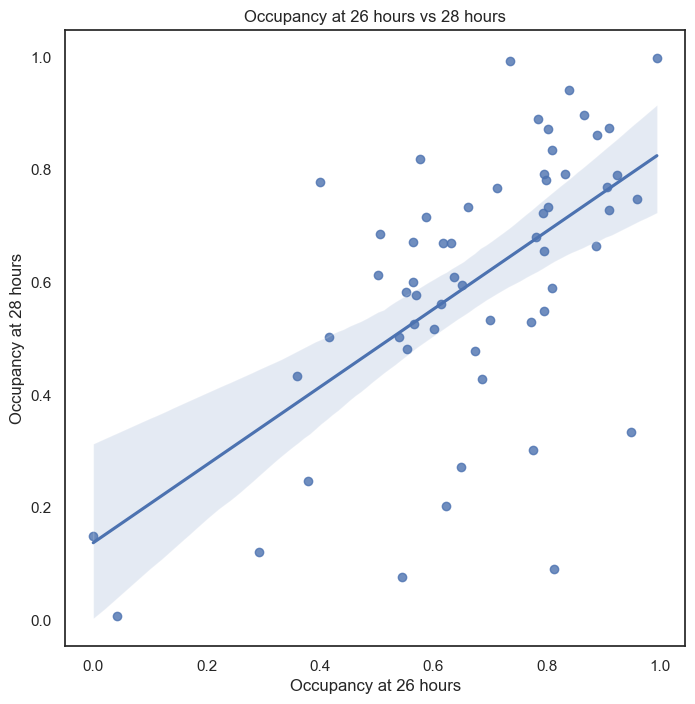

In [ ]:
#set figure to be square
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(x=data_minimal_pivot[[26]],y=data_minimal_pivot[[28]])
plt.title("Occupancy at 26 hours vs 28 hours")
plt.xlabel("Occupancy at 26 hours")
plt.ylabel("Occupancy at 28 hours")

Text(0.5, 1.0, 'Correlation between occupancy at different times')

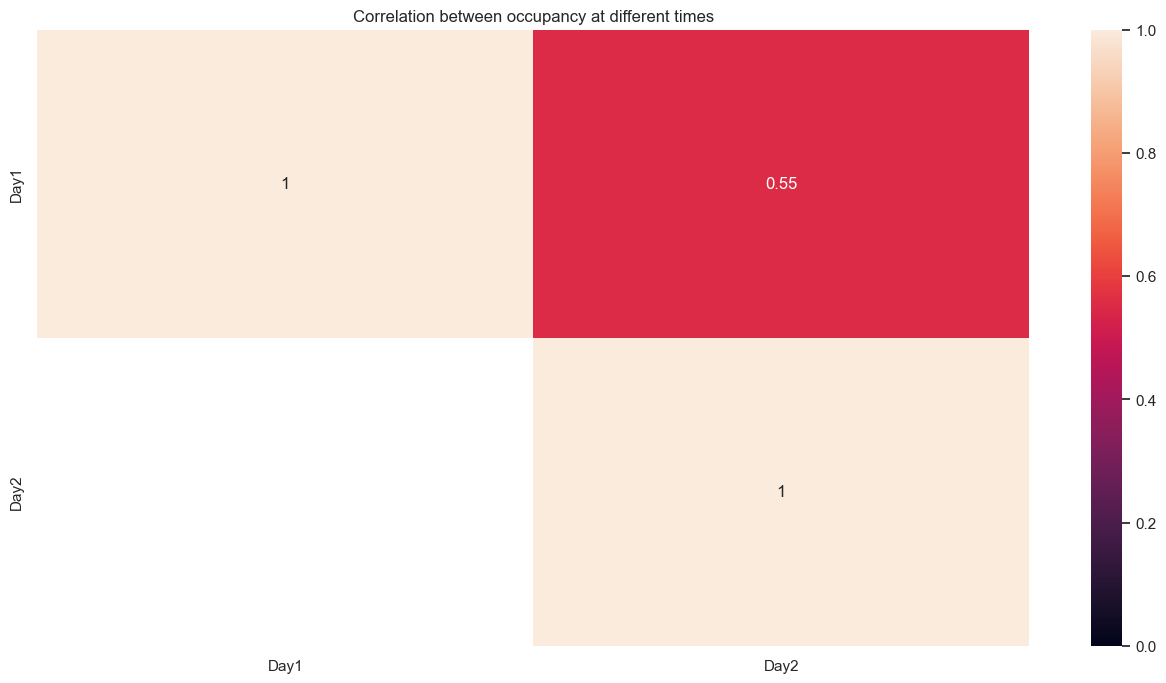

In [ ]:
dayaverages=data_minimal_pivot.groupby(["Day1","Day1","Day1","Day2","Day2","Day2"], axis=1).mean()
daycorr=dayaverages.corr()
mask = np.triu(np.ones_like(daycorr, dtype=bool))

sns.heatmap(daycorr, mask=~mask, vmin=0, vmax=1, annot=True)
plt.title("Correlation between occupancy at different times")

In [ ]:
orderaverages=data_minimal_pivot.groupby(["T1","T2","T3","T1","T2","T3"], axis=1).mean()
# daycorr=dayaverages.corr()

In [ ]:
data_minimal_pivot_plus=pd.concat([data_minimal_pivot, dayaverages, orderaverages], axis=1)
data_minimal_pivot_plus

,0,2,4,24,26,28,Day1,Day2,T1,T2,T3
flyid,,,,,,,,,,,
C6-B1-F1,0.455963,0.924623,0.641509,0.602609,0.809717,0.589393,0.674032,0.667239,0.529286,0.867170,0.615451
C6-B1-F10,0.525688,0.516750,0.540309,0.565217,0.539474,0.502994,0.527582,0.535895,0.545453,0.528112,0.521651
C6-B1-F11,0.621101,0.735343,0.919383,0.321739,0.889676,0.862275,0.758609,0.691230,0.471420,0.812510,0.890829
C6-B1-F12,0.419266,0.578727,0.499142,0.239130,0.699393,0.533790,0.499045,0.490771,0.329198,0.639060,0.516466
C6-B1-F13,0.250459,0.632328,0.615780,0.157391,0.781377,0.680924,0.499522,0.539897,0.203925,0.706852,0.648352
C6-B1-F14,0.342202,0.634003,0.704974,0.478261,0.399798,0.777588,0.560393,0.551882,0.410231,0.516900,0.741281
C6-B1-F15,0.475229,0.552764,0.611492,0.406087,0.660931,0.733105,0.546495,0.600041,0.440658,0.606847,0.672299
C6-B1-F2,0.165138,0.779732,0.622642,0.053043,0.794534,0.722840,0.522504,0.523473,0.109091,0.787133,0.672741
C6-B1-F3,0.698165,1.000000,0.626072,0.525217,0.565789,0.526091,0.774746,0.539033,0.611691,0.782895,0.576081


In [ ]:
data_cummean=data_minimal_pivot.cumsum(axis=1)*(1/np.arange(1,7))
# data_cummean.columns=["1","<2","<4","<24","<26","All"]
data_cummean
daycorr=data_minimal_pivot_plus.corr()
mask = np.triu(np.ones_like(daycorr, dtype=bool))
daycorr


,0,2,4,24,26,28,Day1,Day2,T1,T2,T3
0,1.000000,0.450690,0.241390,0.489391,0.185690,0.162623,0.716422,0.384914,0.811046,0.408787,0.220524
2,0.450690,1.000000,0.530452,0.217902,0.276521,0.497924,0.873575,0.439478,0.367244,0.824942,0.570280
4,0.241390,0.530452,1.000000,0.144651,0.328993,0.609406,0.740557,0.474391,0.217868,0.545557,0.861242
24,0.489391,0.217902,0.144651,1.000000,0.256912,0.384975,0.360514,0.724995,0.911284,0.315942,0.343857
26,0.185690,0.276521,0.328993,0.256912,1.000000,0.591807,0.337134,0.763258,0.304794,0.822738,0.585374
28,0.162623,0.497924,0.609406,0.384975,0.591807,1.000000,0.544028,0.847756,0.376959,0.688982,0.937189
Day1,0.716422,0.873575,0.740557,0.360514,0.337134,0.544028,1.000000,0.553514,0.590378,0.777089,0.698216
Day2,0.384914,0.439478,0.474391,0.724995,0.763258,0.847756,0.553514,1.000000,0.699355,0.765752,0.798549
T1,0.811046,0.367244,0.217868,0.911284,0.304794,0.376959,0.590378,0.699355,1.000000,0.437059,0.385256
T2,0.408787,0.824942,0.545557,0.315942,0.822738,0.688982,0.777089,0.765752,0.437059,1.000000,0.730221


In [ ]:
# mask[0:3, 6]=False
# mask[3:6, 7]=False
# mask[[0,3], 8]=False
# mask[[1,4], 9]=False
# mask[[2,5], 10]=False

mask[6,0:3]=True
mask[7, 3:6]=True
mask[8, [0,3]]=True
mask[9, [1,4]]=True
mask[10, [2,5]]=True

Text(0.5, 1.0, 'Correlation between occupancy at different times')

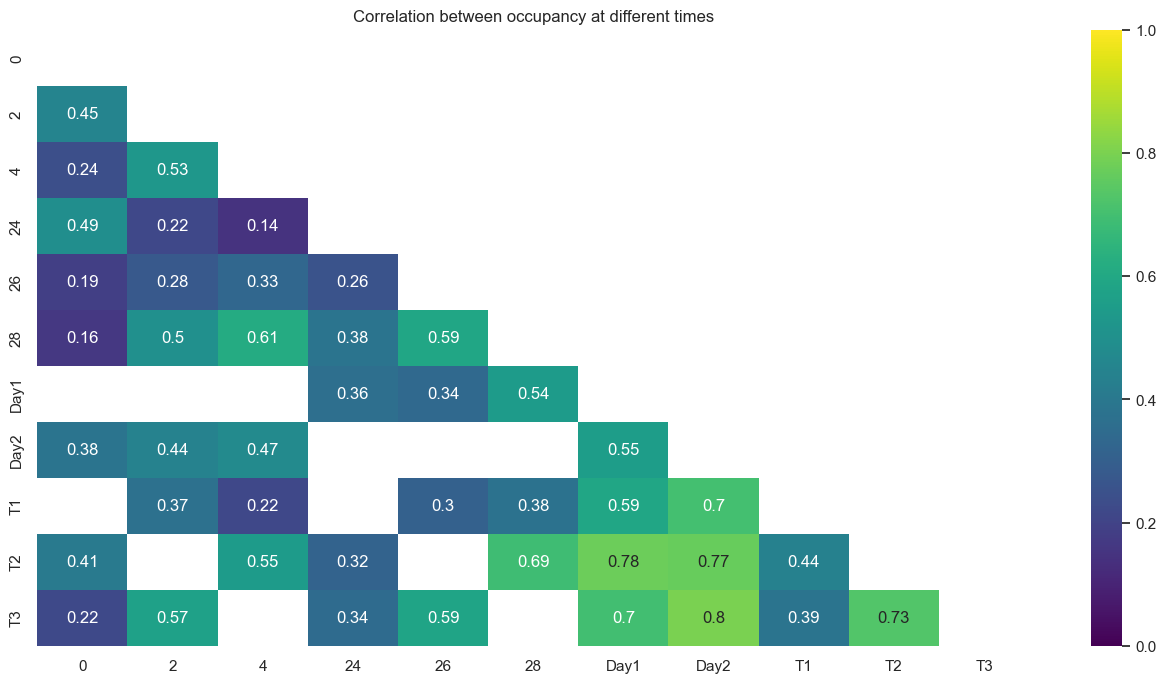

In [ ]:

sns.heatmap(daycorr, mask=mask, vmin=0, vmax=1, annot=True, cmap="viridis")
plt.title("Correlation between occupancy at different times")

In [ ]:
# calculate correlation between each hour and the first hour
for i in data_minimal_pivot.columns:
    print(i, np.corrcoef(data_minimal_pivot[0], data_minimal_pivot[i])[0,1])


0 nan
2 nan
4 nan
24 nan
26 nan
28 nan


In [ ]:
sm.OLS(data_minimal["Occupancy"].values, data_minimal[["Hours", "flyid"]].values).fit().summary()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# fit a linear model for each fly, using flyid as a categorical variable and hours as a continous variable
# plot the residuals for each fly
model=

In [ ]:
# from sklearn.linear_model import TweedieRegressor
# reg = TweedieRegressor(power=1, alpha=0.5, link='log')
# reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])
# TweedieRegressor(alpha=0.5, link='log', power=1)

from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit(data_minimal[["Hours", "flyid"]], data_minimal[["Occupancy"]])
TweedieRegressor(alpha=0.5, link='log', power=1)


In [ ]:
reg.coef_


In [ ]:

reg.intercept_


In [ ]:
from resample.bootstrap import bootstrap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def fitreg(A):
    scale = StandardScaler()
    reg = LinearRegression(fit_intercept=True)
    X_scale = scale.fit_transform(A[:, :A.shape[1]-2])
    y = A[:, A.shape[1]-1]
    reg.fit(X_scale, y)
    return {"coef": reg.coef_, "intercept": reg.intercept_}


In [ ]:
pd.get_dummies(data_minimal["flyid"])
dummyminimal=pd.concat([data_minimal[["Hours", "Occupancy"]], pd.get_dummies(data_minimal["flyid"])], axis=1)
dummyminimal

In [ ]:

boot_coef = bootstrap(a=df.join(y).values, f=fitreg, b=5000)

# Let's try STAN

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import re
import os
from cmdstanpy import cmdstan_path, CmdStanModel
import matplotlib.pyplot as plt